<a href="https://colab.research.google.com/github/StevenMena/07MIAR_RedesNeu_DeepLearning/blob/main/Copy_of_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###<center><b>07MIAR29 - Redes Neuronales y Deep Learning</b></center>

<center>Proyecto de programación "Deep Vision in classification tasks"</center>

<center>Integrantes:<center>

 - Anthony Playmith Sanchez
 - Steven Mena Chavez
 - David Pozo Spin

 <center>

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77733 sha256=41bcbf486e837619c449092e691149a4fb35615698fa5ddd8a5124f69580059c
  Stored in directory: /root/.cache/pip/wheels/9c/45/15/6d6d116cd2539fb8f450d64b0aee4a480e5366bb11b42ac763
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.13
    Uninstalling kaggle-1.5.13:
      Successfully uninstalled kaggle-1.5.13


In [ ]:
# Seleccionar el API Token personal previamente descargado (fichero kaggle.json) from google.colab import files
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anthonyplaymith","key":"74a0496bf2c8d63f4cda124377555eb8"}'}

In [ ]:
# Conectamos con nuestro Google Drive
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Creamos un directorio en el que copiamos el fichero kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# <b>Estrategia 1:</b> Entrenar desde cero o <i>from scratch</i>
##1.   Cargar del dataset



In [ ]:
!kaggle datasets download -d gpiosenka/100-bird-species

100% 1.95G/1.96G [00:12<00:00, 166MB/s]
100% 1.96G/1.96G [00:12<00:00, 170MB/s]


In [ ]:
!unzip 100-bird-species.zip -d my_dataset

##2.   Inspección del conjunto de datos


Found 84635 images belonging to 525 classes.


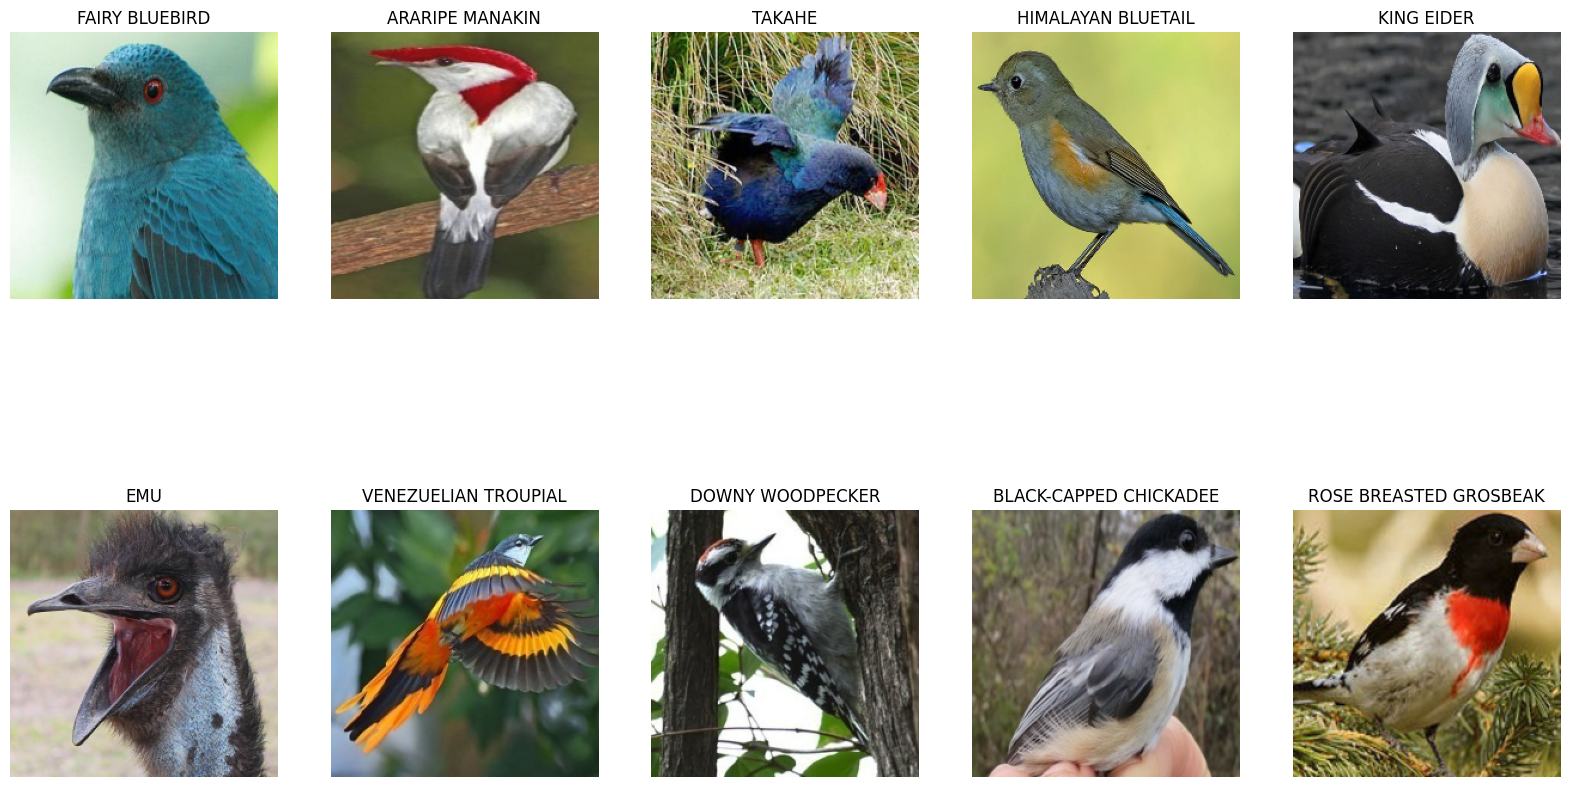

In [ ]:
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D



data_generator = ImageDataGenerator()
train_images = data_generator.flow_from_directory('my_dataset/train')


train_files = train_images.filepaths
train_labels = train_images.classes
class_name = list(train_images.class_indices.keys())

length_images = len(train_labels)
sample_size = min(length_images, 10)
sample_images = random.sample(range(length_images), sample_size)

for i in range(sample_size):
    plt.rcParams['figure.figsize'] = (20, 30)
    img = plt.imread(train_files[sample_images[i]])
    plt.subplot(5, 5, i+1)
    plt.title(class_name[train_labels[sample_images[i]]])
    plt.imshow(img)
    plt.axis('off')

plt.show()

##3.   Acondicionamiento del conjunto de datos


Realizaremos un redimensionamiento de las imágenes y lotes para el poder realizar el entrenamiento de la red neuronal. Para todo esto usaremos un Generator de Imágenes.

In [ ]:
IMG_WIDTH = 150 # 720
IMG_HEIGHT = 150 # 1280
BATCH_SIZE = 32 # 3777

DIRECTORY = './my_dataset/train/'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(directory=DIRECTORY,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(directory=DIRECTORY,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    subset='validation')

Found 67911 images belonging to 525 classes.
Found 16724 images belonging to 525 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:',data_batch.shape)
  print('labels batch shape:',labels_batch.shape)
  break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32, 525)


## 4. Desarrollo de la arquitectura de red neuronal y entrenamiento de la solución

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',
                        input_shape=(150,150,3)))

model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(32960,activation='relu'))
model.add(layers.Dense(525,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 95, # len(train_generator) 
    epochs = 20,
    validation_data = validation_generator, 
    validation_steps = 24 # len(validation_generator)
)

Epoch 1/20
95/95 [==============================] - 583s 6s/step - loss: 6.2434 - acc: 0.0016 - val_loss: 6.2370 - val_acc: 0.0065
Epoch 2/20
95/95 [==============================] - 590s 6s/step - loss: 6.2107 - acc: 0.0063 - val_loss: 6.1445 - val_acc: 0.0039
Epoch 3/20
95/95 [==============================] - 573s 6s/step - loss: 6.0850 - acc: 0.0102 - val_loss: 6.0289 - val_acc: 0.0052
Epoch 4/20
95/95 [==============================] - 597s 6s/step - loss: 5.9155 - acc: 0.0148 - val_loss: 5.8684 - val_acc: 0.0286
Epoch 5/20
95/95 [==============================] - 576s 6s/step - loss: 5.7774 - acc: 0.0204 - val_loss: 5.6588 - val_acc: 0.0273
Epoch 6/20
95/95 [==============================] - 608s 6s/step - loss: 5.5596 - acc: 0.0371 - val_loss: 5.5378 - val_acc: 0.0352
Epoch 7/20
95/95 [==============================] - 631s 7s/step - loss: 5.3963 - acc: 0.0497 - val_loss: 5.3807 - val_acc: 0.0547
Epoch 8/20
95/95 [==============================] - 659s 7s/step - loss: 5.1622 - a

In [ ]:
BASE_FOLDER = "/content/drive"

model.save(BASE_FOLDER + 'Birds_Monitoring_1.h5')

In [ ]:
len(train_generator) # Cantidad de lotes que se han generado para el entrenamiento >>> steps_per_epoch

2075

In [ ]:
len(validation_generator)# Cantidad de lotes que se han generado para la validación >>> validation_steps

511

##5.   Monitorización del proceso de entrenamiento para la toma de decisiones

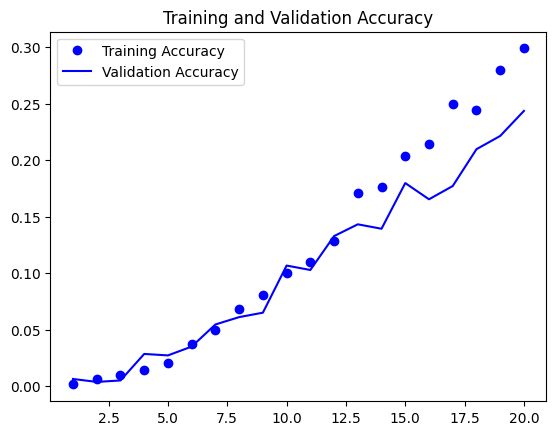

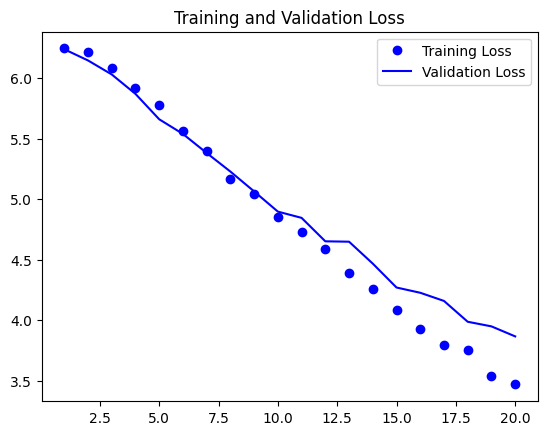

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

##6.   Evaluación del modelo predictivo y planteamiento de 

---

la siguiente prueba experimental

Como se puede ver en los graficos, el modelo esta un poco sobreajustado.

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
import os
contenido = os.listdir('my_dataset/train')
contenido.sort()
files = contenido[1:]
files

['ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AMERICAN PIPIT',
 'AMERICAN REDSTART',
 'AMERICAN ROBIN',
 'AMERICAN WIGEON',
 'AMETHYST WOODSTAR',
 'ANDEAN GOOSE',
 'ANDEAN LAPWING',
 'ANDEAN SISKIN',
 'ANHINGA',
 'ANIANIAU',
 'ANNAS HUMMINGBIRD',
 'ANTBIRD',
 'ANTILLEAN EUPHONIA',
 'APAPANE',
 'APOSTLEBIRD',
 'ARARIPE MANAKIN',
 'ASHY STORM PETREL',
 'ASHY THRUSHBIRD',
 'ASIAN CRESTED IBIS',
 'ASIAN DOLLARD BIRD',
 'ASIAN GREEN BEE EATER',
 'ASIAN OPENBILL STORK',
 'AUCKLAND SHAQ',
 'AUSTRAL CANASTERO',
 'AUSTRALASIAN FIGBIRD',
 'AVADAVAT',
 'AZARAS SPINETAIL',
 'AZURE BREASTED PITTA',
 'AZURE JAY',
 'AZURE T

In [ ]:
model.evaluate(validation_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False)

511/511 [==============================] - 535s 1s/step - loss: 3.8346 - acc: 0.2517


[3.834644317626953, 0.2517435550689697]

In [ ]:
pred = model.predict_generator(validation_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)  
predicted = np.argmax(pred, axis=1)  

<ipython-input-45-92e932ceb69e>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(validation_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)


511/511 [==============================] - 545s 1s/step


In [ ]:
def predict_one(model):  
    image_batch, classes_batch = next(validation_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0]):
      image = image_batch[k]
      pred = predicted_batch[k]
      the_pred = np.argmax(pred)
      predicted = files[the_pred]
      val_pred = max(pred)
      the_class = np.argmax(classes_batch[k])
      value = files[np.argmax(classes_batch[k])]
      plt.figure(k)
      isTrue = (the_pred == the_class)
      plt.title(str(isTrue) + ' - class: ' + value + ' - ' + 'predicted: ' + predicted + '[' + str(val_pred) + ']')
      plt.imshow(image)

predict_one(model)  

##7.   Re-acondicionamiento del conjunto de datos

Luego de visualizar en nuestro primer modelo Over-fitting, usaremos varias técnicas para reducirlo. En este punto usaremos <i>Data augmentation</i>.

In [ ]:
train_datagen_2 = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.2,
                                    rotation_range = 40,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    fill_mode = 'nearest'
)

train_generator_2 = train_datagen_2.flow_from_directory(directory=DIRECTORY,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator_2 = train_datagen.flow_from_directory(directory=DIRECTORY,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    subset='validation')

Found 66378 images belonging to 515 classes.
Found 16346 images belonging to 515 classes.


##8.   Desarrollo de la nueva arquitectura de red neuronal y entrenamiento de la solución
Para reducir el over-fitting detectado, además de Data augmentation también tenemos que utilizar una o dos capas de <i>Dropout</i> y <i>Regularizar</i> el modelo para su entrenamiento final.




In [ ]:
from keras import regularizers

model_2 = models.Sequential()
model_2.add(layers.Conv2D(32,(3,3),activation='relu',
                        input_shape=(150,150,3)))

model_2.add(layers.MaxPooling2D((2,2)))
model_2.add(layers.Conv2D(64,(3,3),activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
model_2.add(layers.MaxPooling2D((2,2)))
model_2.add(layers.Conv2D(128,(3,3),activation='relu'))
model_2.add(layers.MaxPooling2D((2,2)))
model_2.add(layers.Conv2D(128,(3,3),activation='relu'))
model_2.add(layers.MaxPooling2D((2,2)))

model_2.add(layers.Flatten())
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(32960,activation='relu'))
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(515,activation='softmax'))

In [ ]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
model_2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
history_2 = model_2.fit(
    train_generator,
    steps_per_epoch = 95, # len(train_generator) 
    epochs = 20,
    validation_data = validation_generator, 
    validation_steps = 24 # len(validation_generator)
)

Epoch 1/20
95/95 [==============================] - 600s 6s/step - loss: 13.2947 - acc: 0.0013 - val_loss: 12.4151 - val_acc: 0.0026
Epoch 2/20
95/95 [==============================] - 597s 6s/step - loss: 11.6407 - acc: 0.0049 - val_loss: 10.8912 - val_acc: 0.0026
Epoch 3/20
95/95 [==============================] - 598s 6s/step - loss: 10.2347 - acc: 0.0026 - val_loss: 9.5961 - val_acc: 0.0026
Epoch 4/20
95/95 [==============================] - 601s 6s/step - loss: 9.0565 - acc: 0.0030 - val_loss: 8.5359 - val_acc: 0.0013
Epoch 5/20
95/95 [==============================] - 586s 6s/step - loss: 8.0890 - acc: 0.0043 - val_loss: 7.6672 - val_acc: 0.0013
Epoch 6/20
95/95 [==============================] - 612s 6s/step - loss: 7.3388 - acc: 0.0039 - val_loss: 7.0352 - val_acc: 0.0026
Epoch 7/20
95/95 [==============================] - 609s 6s/step - loss: 6.7855 - acc: 0.0072 - val_loss: 6.5665 - val_acc: 0.0065
Epoch 8/20
95/95 [==============================] - 592s 6s/step - loss: 6.416

In [ ]:
model_2.save(BASE_FOLDER + 'Birds_Monitoring_2.h5')

##9.   Monitorización del proceso de entrenamiento para la toma de decisiones

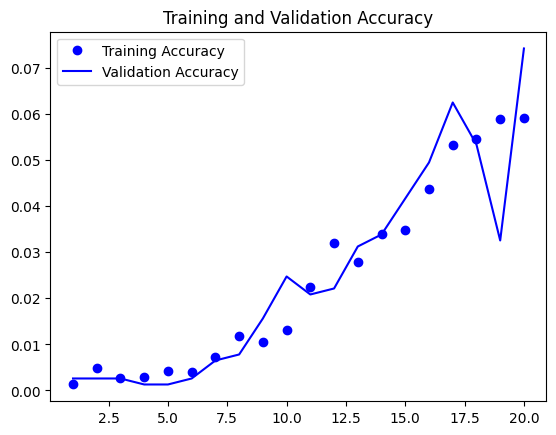

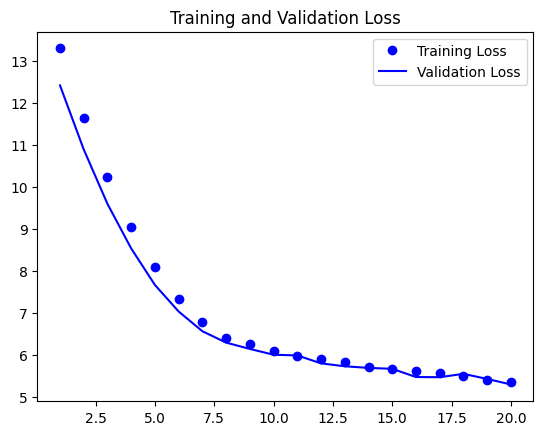

In [ ]:
acc_2 = history_2.history['acc']
val_acc_2 = history_2.history['val_acc']
loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc_2, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_2, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_2, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_2, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

## 10.   Evaluación del modelo predictivo y planteamiento de la siguiente prueba experimental


In [ ]:
model_2.evaluate(validation_generator_2, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False)

NameError: ignored

In [ ]:
import cv2
import os


def test_images():
    directory = 'test_stg1/'
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        test = cv2.imread(f)
        test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
        test = cv2.resize(test, (150, 150))
        test = test.reshape((1, 150, 150, 3))
        result = model_2.predict(test)
        print(result)

test_images()

In [ ]:
pred_2 = model_2.predict_generator(validation_generator_2, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)  
predicted_2 = np.argmax(pred_2, axis=1)  

In [ ]:
predict_one(model_2)

In [ ]:
predictions = model_2.predict(validation_generator_2)
y_preds = tf.argmax(predictions, axis=1)
y_true = validation_generator_2.classes
print(classification_report(y_true=y_true, y_pred=y_preds, target_names=files))

# <b>Estrategia 2:</b> Red pre-entrenada
##3.   Acondicionamiento del conjunto de datos
Realizaremos un redimensionamiento de las imágenes y lotes para el poder realizar el entrenamiento de la red neuronal. Para todo esto usaremos un Generator de Imágenes.

In [ ]:
train_datagen_3 = ImageDataGenerator(rescale=1./255,
                                     validation_split=0.2,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest'
)

train_generator_3 = train_datagen_3.flow_from_directory(directory=DIRECTORY,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator_3 = train_datagen.flow_from_directory(directory=DIRECTORY,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    subset='validation')

Found 67911 images belonging to 525 classes.
Found 16724 images belonging to 525 classes.


##4.   Desarrollo de la arquitectura de red neuronal y entrenamiento de la solución


In [ ]:
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet

In [ ]:
conv_base = ResNet50(weights='imagenet',
                     include_top=False,
                     input_shape=(150,150,3)
                    )

In [ ]:
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']      

In [ ]:
from tensorflow.keras import regularizers

model_3 = models.Sequential()
model_3.add(conv_base)

# convolutional layers
model_3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_3.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

model_3.add(layers.Flatten())

# dropout and L2 regularization
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(525, activation='softmax'))


In [ ]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 conv2d_10 (Conv2D)          (None, 5, 5, 64)          1179712   
                                                                 
 conv2d_11 (Conv2D)          (None, 5, 5, 128)         73856     
                                                                 
 conv2d_12 (Conv2D)          (None, 5, 5, 256)         295168    
                                                                 
 flatten_2 (Flatten)         (None, 6400)              0         
                                                                 
 dropout_4 (Dropout)         (None, 6400)              0         
                                                                 
 dense_4 (Dense)             (None, 512)              

In [ ]:
print('Este es el número de pesos entrenables antes de congelar la conv_base:', len(model_3.trainable_weights))
conv_base.trainable=False
print('Este es el número de pesos entrenables después de congelar la conv_base:', len(model_3.trainable_weights))

Este es el número de pesos entrenables antes de congelar la conv_base: 10
Este es el número de pesos entrenables después de congelar la conv_base: 10


In [ ]:
model_3.compile(loss='categorical_crossentropy',
                optimizer=optimizers.RMSprop(learning_rate=2e-5),
                metrics=['acc'])

In [ ]:
history_3 = model_3.fit(
    train_generator,
    steps_per_epoch=95,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=24
)

Epoch 1/20
95/95 [==============================] - 199s 2s/step - loss: 7.2215 - acc: 0.0023 - val_loss: 7.2026 - val_acc: 0.0000e+00
Epoch 2/20
95/95 [==============================] - 203s 2s/step - loss: 7.1996 - acc: 0.0020 - val_loss: 7.1848 - val_acc: 0.0052
Epoch 3/20
95/95 [==============================] - 194s 2s/step - loss: 7.1785 - acc: 3.2895e-04 - val_loss: 7.1636 - val_acc: 0.0013
Epoch 4/20
95/95 [==============================] - 192s 2s/step - loss: 7.1585 - acc: 0.0030 - val_loss: 7.1465 - val_acc: 0.0013
Epoch 5/20
95/95 [==============================] - 200s 2s/step - loss: 7.1410 - acc: 0.0016 - val_loss: 7.1323 - val_acc: 0.0013
Epoch 6/20
95/95 [==============================] - 190s 2s/step - loss: 7.1252 - acc: 9.8684e-04 - val_loss: 7.1101 - val_acc: 0.0039
Epoch 7/20
95/95 [==============================] - 189s 2s/step - loss: 7.1073 - acc: 0.0026 - val_loss: 7.0955 - val_acc: 0.0026
Epoch 8/20
95/95 [==============================] - 207s 2s/step - loss

In [ ]:
# Conectamos con nuestro Google Drive
from google.colab import drive 
drive.mount('/content/drive')
BASE_FOLDER = "/content/drive/MyDrive/"
model_3.save(BASE_FOLDER + 'Birds_Monitoring_3.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##5.   Monitorización del proceso de entrenamiento para la toma de decisiones

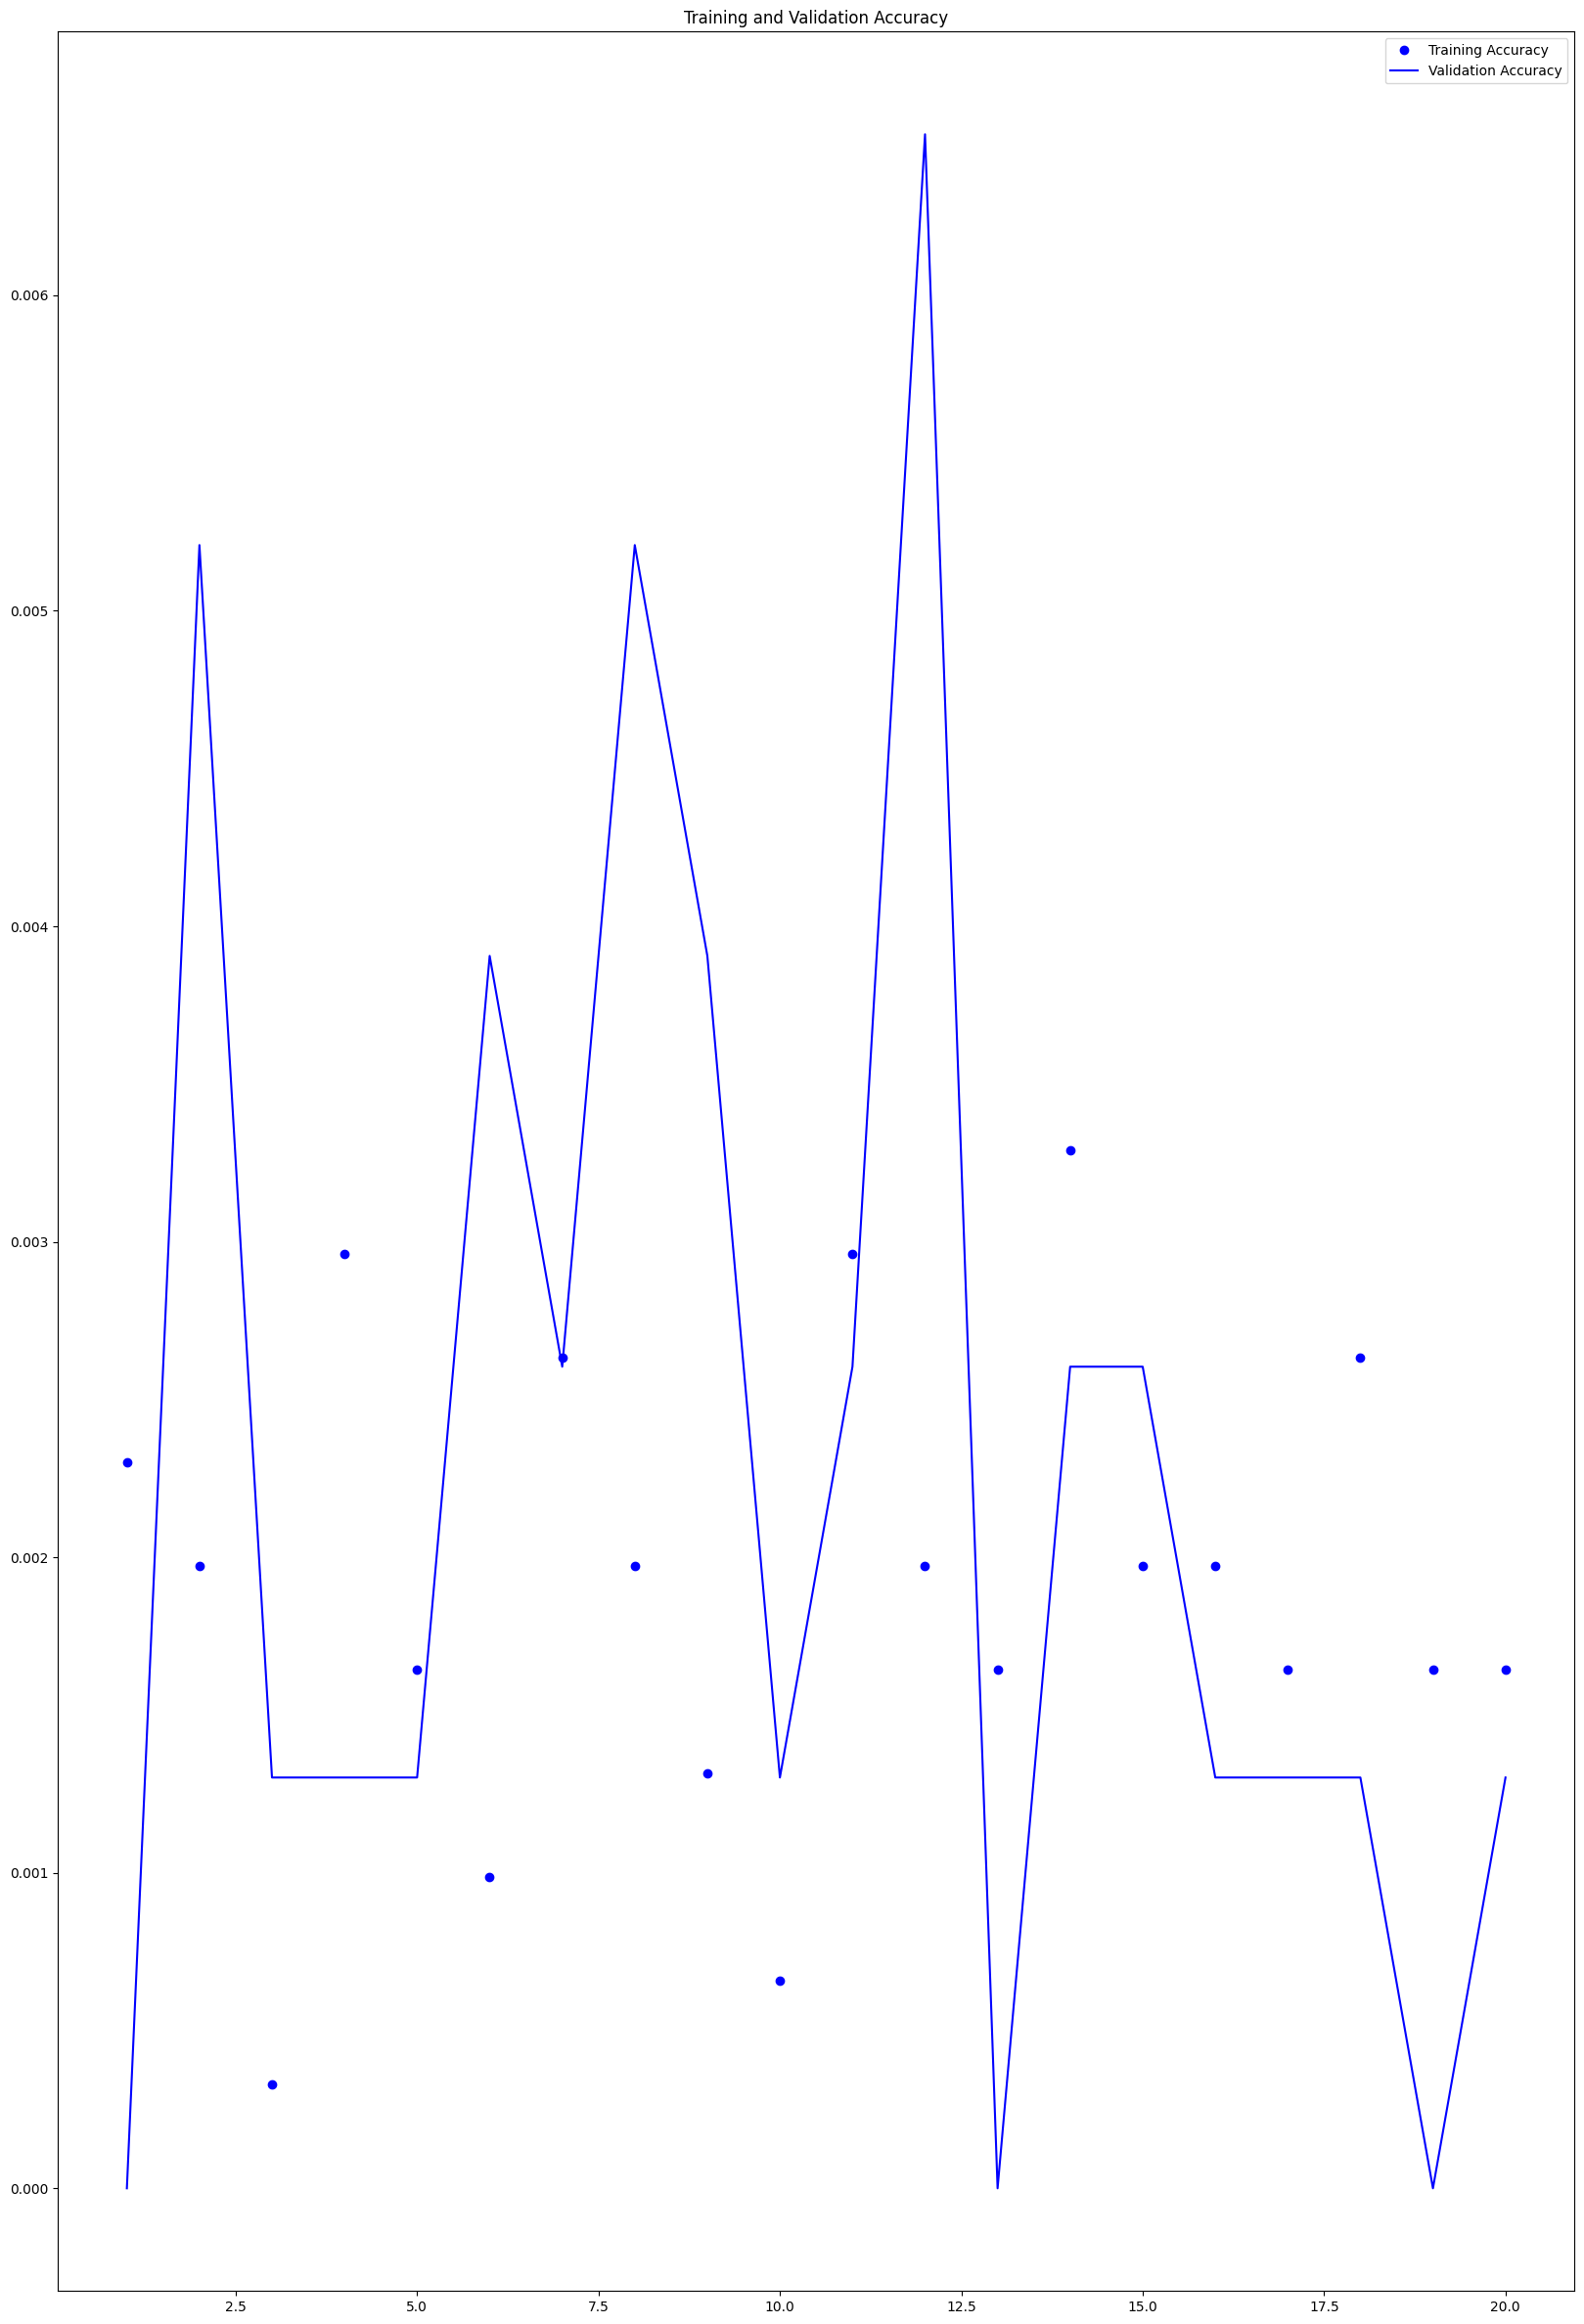

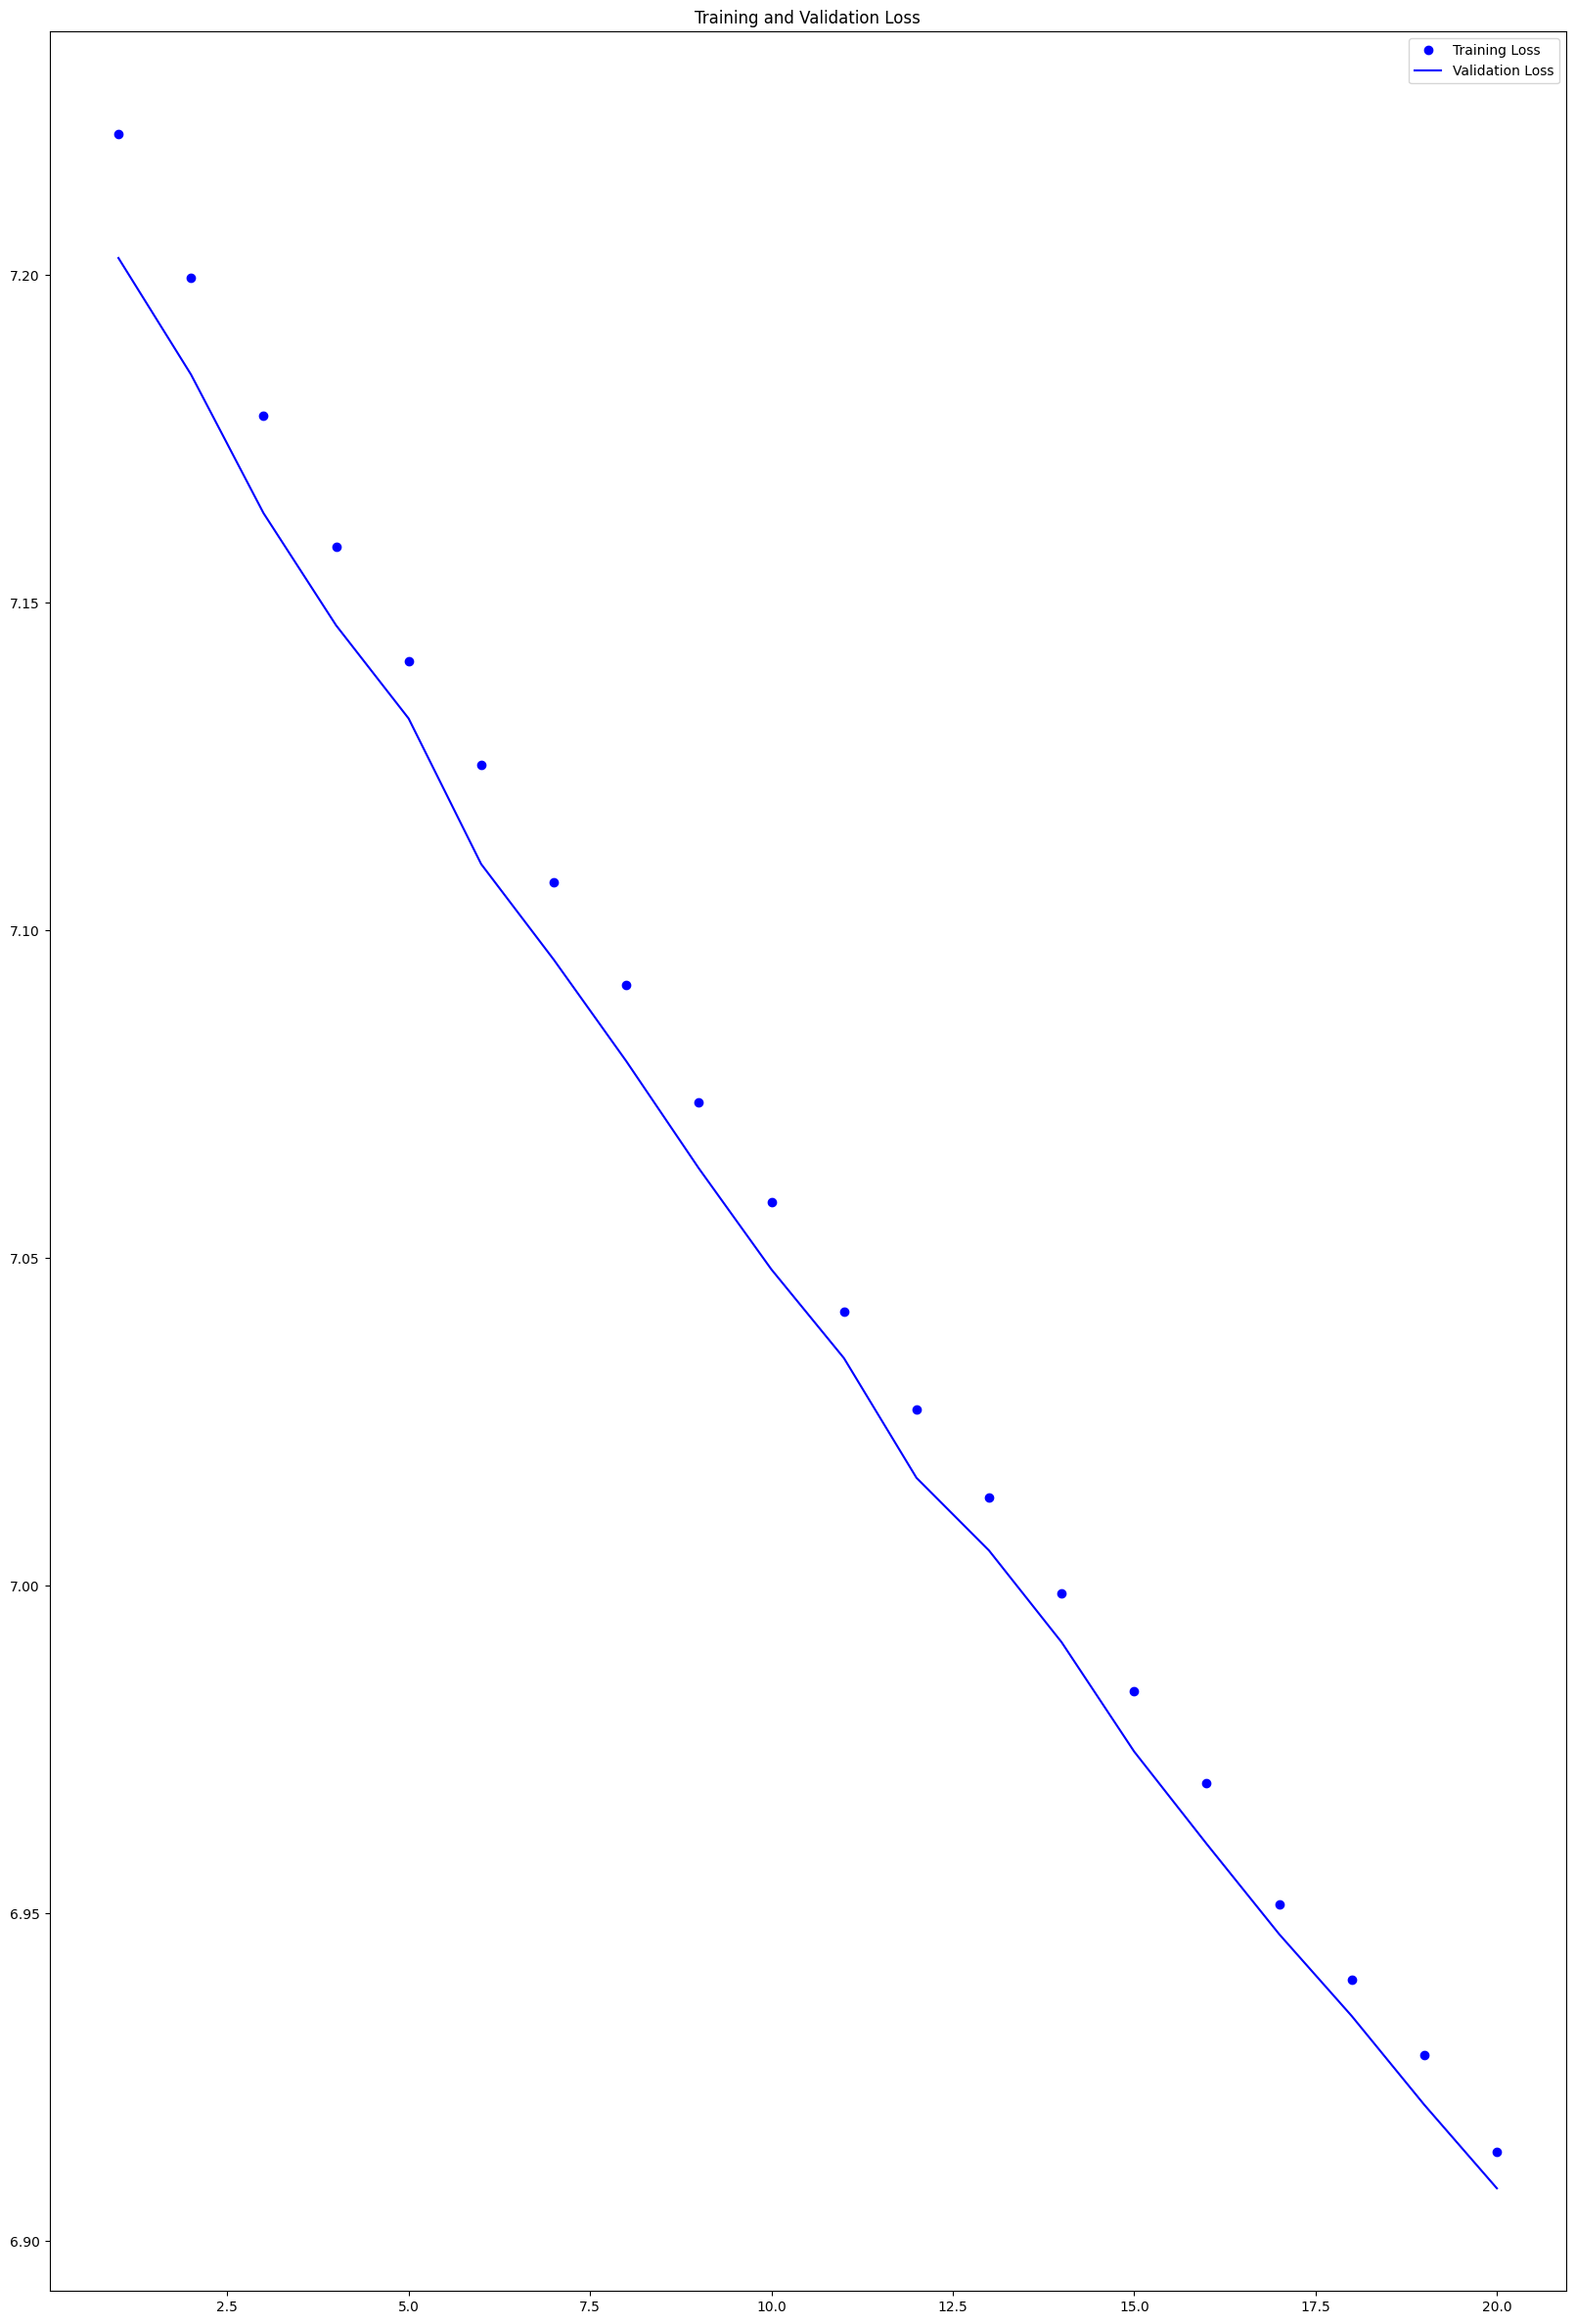

In [ ]:
import matplotlib.pyplot as plt

acc_3 = history_3.history['acc']
val_acc_3 = history_3.history['val_acc']
loss_3 = history_3.history['loss']
val_loss_3 = history_3.history['val_loss']

epochs = range(1,len(acc_3) + 1)

plt.plot(epochs, acc_3, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_3, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_3, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_3, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


## 6.   Evaluación del modelo predictivo y planteamiento de la siguiente prueba experimental

In [ ]:
model_3.evaluate(validation_generator_3, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False)

523/523 [==============================] - 807s 2s/step - loss: 6.9057 - acc: 0.0023


[6.905730247497559, 0.002331977942958474]

In [ ]:
pred_3 = model_3.predict_generator(validation_generator_3, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)  
predicted_3 = np.argmax(pred_3, axis=1)

<ipython-input-35-0985bab38d6d>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred_3 = model_3.predict_generator(validation_generator_3, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)


523/523 [==============================] - 791s 2s/step


NameError: ignored

In [ ]:
predict_one(model_3) 

##7.   Re-acondicionamiento del conjunto de datos
Luego de visualizar en nuestro primer modelo Over-fitting, usaremos otro tipo de arquitectura y luego visualizar su desenvolvimiento.

In [ ]:
train_datagen_4 = ImageDataGenerator(rescale=1./255,
                                     validation_split=0.2,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest'
)

train_generator_4 = train_datagen_4.flow_from_directory(directory=DIRECTORY,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator_4 = train_datagen.flow_from_directory(directory=DIRECTORY,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    subset='validation')

##8.   Desarrollo de la nueva arquitectura de red neuronal y entrenamiento de la solución

In [ ]:
conv_base_2 = VGG16(weights='imagenet',
                     include_top=False,
                     input_shape=(150,150,3)
                    )

In [ ]:
conv_base_2.summary()

In [ ]:
from tensorflow.keras import regularizers

model_3 = models.Sequential()
model_3.add(conv_base_2)

# Add additional convolutional layers
model_3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_3.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

model_3.add(layers.Flatten())

# Add dropout and L2 regularization
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(525, activation='softmax'))

# Use a different optimizer and experiment with learning rates
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
#model_3.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])


In [ ]:
model_4.summary()

In [ ]:
print('Este es el número de pesos entrenables antes de congelar la conv_base:', len(model_4.trainable_weights))
conv_base_2.trainable=False
print('Este es el número de pesos entrenables después de congelar la conv_base:', len(model_4.trainable_weights))

In [ ]:
model_4.compile(loss='categorical_crossentropy',
                optimizer=optimizers.RMSprop(learning_rate=2e-5),
                metrics=['acc'])

In [ ]:
history_4 = model_4.fit(
    train_generator,
    steps_per_epoch=95,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=24
)

In [ ]:
model_4.save(BASE_FOLDER + 'Birds_Monitoring_4.h5')

##9.   Monitorización del proceso de entrenamiento para la toma de decisiones

In [ ]:
acc_4 = history_4.history['acc']
val_acc_4 = history_4.history['val_acc']
loss_4 = history_4.history['loss']
val_loss_4 = history_4.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc_4, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_4, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_4, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_4, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

##10. Fining Tuning

In [ ]:
model_5=models.Sequential()
model_5.add(conv_base_2)
model_5.add(layers.Flatten())
model_5.add(layers.Dense(256,activation='relu'))
model_5.add(layers.Dense(8,activation='softmax'))

In [ ]:
conv_base_2.trainable = True

set_trainable = False
for layer in conv_base_2.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainanle = True
  else:
    layer.trainable = False

In [ ]:
model_5.compile(loss='categorical_crossentropy',
                optimizer=optimizers.RMSprop(learning_rate=2e-5),
                metrics=['acc'])

In [ ]:
history_5 = model_5.fit(
    train_generator,
    steps_per_epoch=95,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=24
)

In [ ]:
acc_5 = history_5.history['acc']
val_acc_5 = history_5.history['val_acc']
loss_5 = history_5.history['loss']
val_loss_5 = history_5.history['val_loss']

epochs = range(1,len(acc) + 1)
plt.plot(epochs, acc_5, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_5, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_5, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_5, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

## 11.   Evaluación del modelo predictivo y planteamiento de la siguiente prueba experimental

In [ ]:
predictions_2 = model_4.predict(validation_generator_4)
y_preds_2 = tf.argmax(predictions_2, axis=1)
y_true_2 = validation_generator_4.classes
print(classification_report(y_true=y_true, y_pred=y_preds, target_names=files)) 

In [ ]:
predictions_3 = model_5.predict(validation_generator_4)
y_preds_3 = tf.argmax(predictions_3, axis=1)
y_true_3 = validation_generator_4.classes
print(classification_report(y_true=y_true, y_pred=y_preds, target_names=files)) 